# Итоговая работа по теме "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"

In [2920]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
%matplotlib inline

In [2921]:
# Set constants
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

PREPARED_TRAIN_DATASET_PATH = 'prepared_train.csv'
PREPARED_TEST_DATASET_PATH = 'prepared_test.csv'

MODEL_FILE_PATH = 'model.pkl'

FINAL_PREDICTIONS_PATH ='ESineokov_predictions.csv'

In [2922]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    Plot results.
    
    train_true_values: array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values train dataset
        
    train_pred_values:array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values train dataset
        
    test_true_values: array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values test dataset
        
    test_pred_values: array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values test dataset
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [2923]:
# Read train dataset
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [2924]:
# Read test dataset
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [2925]:
# Show sizes
df_train.shape, df_test.shape

((10000, 20), (5000, 19))

## Приведение типов данных

In [2926]:
# Show info train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [2927]:
# Show info test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [2928]:
# Remove `Id` field & Reset Index
df_train.drop(columns='Id', inplace=True)
df_train.reset_index(drop=True, inplace=True)

df_test.drop(columns='Id', inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [2929]:
# Set DistrictId to str type
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_test['DistrictId'] = df_test['DistrictId'].astype(str)

In [2930]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

## Обзор данных

**Целевая переменная**

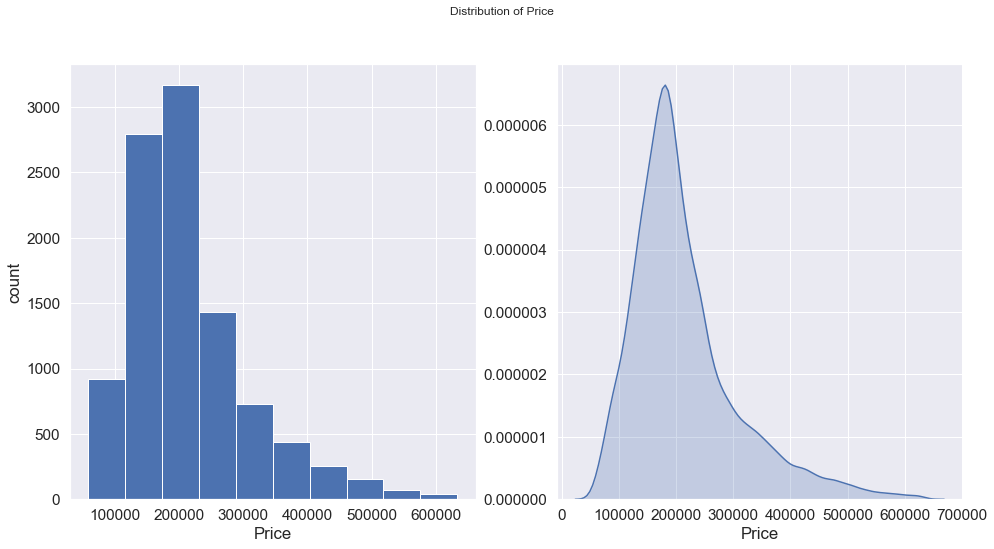

In [2931]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

### Обзор количественных переменных

In [2932]:
df_train_num_features = df_train.select_dtypes('float64', 'int64')

In [2933]:
df_train_num_features.head()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Price
0,2.0,47.981561,29.442751,6.0,9.0,0.089040,NaN,184966.930730
1,3.0,65.683640,40.049543,8.0,9.0,0.000070,240.0,300009.450063
2,2.0,44.947953,29.197612,0.0,12.0,0.049637,229.0,220925.908524
3,2.0,53.352981,52.731512,9.0,17.0,0.437885,1084.0,175616.227217
4,1.0,39.649192,23.776169,7.0,12.0,0.012339,2078.0,150226.531644


In [2934]:
df_train_num_features.describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,12.609400,0.118858,1142.904460,214138.857399
std,0.839512,21.058732,86.241209,28.560917,6.775974,0.119025,1021.517264,92872.293865
min,0.000000,1.136859,0.370619,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,9.000000,0.017647,350.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,13.000000,0.075424,900.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,17.000000,0.195781,1548.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,117.000000,0.521867,4849.000000,633233.466570


### Обзор номинативных переменных

In [2935]:
df_traint_obj_features = df_train.select_dtypes(include='object')
df_traint_obj_features.head()

,DistrictId,Ecology_2,Ecology_3,Shops_2
0,35,B,B,B
1,41,B,B,B
2,53,B,B,B
3,58,B,B,B
4,99,B,B,B


In [2936]:
df_traint_obj_features.describe()

,DistrictId,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000,10000
unique,205,2,2,2
top,27,B,B,B
freq,851,9903,9725,9175


In [2937]:
for cat_colname in df_traint_obj_features.columns.tolist()[1:]:
    print(str(cat_colname) + '\n\n' + str(df_traint_obj_features[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



### Обработка выбросов

In [2938]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [2939]:
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


**Rooms**

In [2940]:
# Из вывода метода describe видно, что у некоторых квартир очень много комнат
df_train['Rooms'].value_counts(), df_test['Rooms'].value_counts()

(2.0     3880
 1.0     3705
 3.0     2235
 4.0      150
 5.0       18
 0.0        8
 10.0       2
 19.0       1
 6.0        1
 Name: Rooms, dtype: int64,
 2.0     2030
 1.0     1769
 3.0     1099
 4.0       90
 5.0        7
 0.0        2
 6.0        2
 17.0       1
 Name: Rooms, dtype: int64)

In [2941]:
# Слишком большое и маленькое количество комнат в квартире приравняем к медиане
df_train.loc[df_train['Rooms'].isin([0, 10, 19]), 'Rooms'] = df_train['Rooms'].median()
df_test.loc[df_test['Rooms'].isin([0, 17]), 'Rooms'] = df_test['Rooms'].median()

**Square, LifeSquare, KitchenSquare**

In [2942]:
# Из вывода метода describe было видно, что некоторые плодащи квартир очень маленькие и наоборот слишком большие
# Удалим такие записи
df_train = df_train[df_train['Square'].isnull() |
                    (df_train['Square'] < df_train['Square'].quantile(.99)) &
                    (df_train['Square'] > df_train['Square'].quantile(.01))]

df_train = df_train[df_train['LifeSquare'].isnull() |
                    (df_train['LifeSquare'] < df_train['LifeSquare'].quantile(.99)) &
                    (df_train['LifeSquare'] > df_train['LifeSquare'].quantile(.01))]

df_train = df_train[df_train['KitchenSquare'].isnull() |
                    (df_train['KitchenSquare'] < df_train['KitchenSquare'].quantile(.99)) &
                    (df_train['KitchenSquare'] > df_train['KitchenSquare'].quantile(.01))]

In [2943]:
# Заменим оставшиеся маленькие площади жилых комнат и кухонь
df_train.loc[df_train['LifeSquare'] < 10, 'LifeSquare'] = 10
df_train.loc[df_train['KitchenSquare'] < 6, 'KitchenSquare'] = 6

In [2944]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,8881.000000,8881.000000,7296.000000,8881.000000,8881.000000,8881.000000,8.881000e+03,8881.000000,8881.000000,8881.000000,8881.000000,4799.000000,8881.000000,8881.000000,8881.000000
mean,1.884585,54.809487,34.909291,7.500732,8.446684,12.826934,4.242532e+03,0.119620,26.071163,5630.480014,8.403783,1156.072932,1.392636,4.438577,214939.479049
std,0.797003,16.225349,14.126708,1.856576,5.133763,6.369206,2.127571e+05,0.119654,17.269698,3977.902810,24.295214,1032.814421,1.492092,4.837340,89654.209673
min,1.000000,29.719934,10.000000,6.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.637555,22.863805,6.000000,4.000000,9.000000,1.972000e+03,0.017647,10.000000,2370.000000,0.000000,325.000000,0.000000,1.000000,156934.440088
50%,2.000000,51.656012,32.459931,6.000000,7.000000,14.000000,1.977000e+03,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503
75%,2.000000,64.720916,44.119769,9.000000,12.000000,17.000000,2.000000e+03,0.194489,36.000000,7614.000000,5.000000,1548.000000,3.000000,6.000000,250381.580780
max,6.000000,117.855969,88.381356,14.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [2945]:
# Для тестовой выборки:
# Заменим оставшиеся маленькие плоащади жилых комнат и кухонь

df_test.loc[df_test['LifeSquare'] < 10, 'LifeSquare'] = 10
df_test.loc[df_test['KitchenSquare'] < 6, 'KitchenSquare'] = 6

In [2946]:
# Всем квартирам из тестовой выборки с общей площадью менее 20 кв/м устанвовим среднее по району с таким же количесчвом комнат
# + Добавим новые поля для дальнейших расчетов
med_square_by_district = df_test.groupby(['DistrictId', 'Rooms'], as_index=False).agg({"Square": 'median'}).rename(columns={'Square': 'MedSquareByDistrict'})
med_lifesquare_by_district = df_test.groupby(['DistrictId', 'Rooms'], as_index=False).agg({"LifeSquare": 'median'}).rename(columns={'LifeSquare': 'MedLifeSquareByDistrict'})
med_kitchensquare_by_district = df_test.groupby(['DistrictId', 'Rooms'], as_index=False).agg({"KitchenSquare": 'median'}).rename(columns={'KitchenSquare': 'MedKitchenSquareByDistrict'})

df_test = df_test.merge(med_square_by_district, on=['DistrictId', 'Rooms'])
df_test = df_test.merge(med_lifesquare_by_district, on=['DistrictId', 'Rooms'])
df_test = df_test.merge(med_kitchensquare_by_district, on=['DistrictId', 'Rooms'])
df_test.loc[df_test['Square'] < 20, 'Square'] = df_test.loc[df_test['Square'] < 20, 'MedSquareByDistrict']
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
count,5000.00000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,4996.000000,5000.000000
mean,1.90780,56.536990,36.341596,7.710400,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,55.901263,36.679896,6.842400
std,0.81008,18.947553,17.517364,9.356112,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,16.587858,12.681050,1.388037
min,1.00000,13.597819,10.000000,6.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,13.597819,10.000000,6.000000
25%,1.00000,41.924256,23.092026,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,42.134067,30.196726,6.000000
50%,2.00000,52.924953,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,51.888697,33.814944,6.000000
75%,2.00000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,64.243323,46.555503,8.000000
max,6.00000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,223.453689,169.901701,42.000000


In [2947]:
# Из предыдущего df_test.describe() видно, что LifeSquare у тестовой выбокрки в значении max слишком большой
df_test.loc[df_test['LifeSquare'] > df_test['LifeSquare'].quantile(0.999)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
997,62,3.0,137.653211,136.921090,6.0,4,3.0,1977,0.072158,B,...,2,629,1,NaN,0,0,A,87.186844,48.381257,6.0
3638,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,...,25,6149,0,NaN,0,0,B,50.683670,32.258703,6.5
4807,93,3.0,136.389391,136.689191,6.0,1,1.0,1977,0.004949,B,...,0,186,0,NaN,0,0,B,135.753446,47.755897,6.0
4876,17,4.0,168.729035,169.901701,6.0,4,0.0,2013,0.093443,B,...,23,4635,5,3300.0,2,4,B,168.729035,169.901701,6.0


In [2948]:
# LifeSquare == 303.071094 выглядит подозрительно. Скорее всего перепутана место запятой
# Вернем её на место
df_test.loc[df_test['LifeSquare'] > 303, 'LifeSquare'] = df_test.loc[df_test['LifeSquare'] > 303, 'LifeSquare']/10

In [2949]:
df_test.loc[df_test['LifeSquare'] > 303, 'LifeSquare']

Series([], Name: LifeSquare, dtype: float64)

In [2950]:
# Проверим KitchenSquare. Он по выводу из df_test.describe() тоже в значении max показал очень большие значения
df_test.loc[df_test['KitchenSquare'] > df_test['KitchenSquare'].quantile(0.998)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
237,27,1.0,66.099096,33.639611,62.0,3,7.0,2016,0.014058,B,...,1,290,0,NaN,0,0,B,42.726201,30.950944,6.0
817,27,2.0,62.326044,NaN,61.0,12,17.0,1977,0.072158,B,...,2,629,1,NaN,0,0,A,62.833897,42.973292,6.0
928,27,2.0,60.988496,33.646726,60.0,5,17.0,2013,0.072158,B,...,2,629,1,NaN,0,0,A,62.833897,42.973292,6.0
953,27,2.0,59.054990,61.647531,57.0,13,12.0,2016,0.211401,B,...,9,1892,0,NaN,0,1,B,62.833897,42.973292,6.0
972,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,...,28,6533,1,1015.0,2,5,B,47.572266,31.249479,6.0
993,62,3.0,112.114019,112.247841,112.0,3,3.0,2017,0.072158,B,...,2,629,1,NaN,0,0,A,87.186844,48.381257,6.0
1158,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,...,5,1564,0,540.0,0,0,B,63.437771,38.068810,6.0
3926,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,...,10,2277,2,1547.0,0,0,B,45.521679,30.896898,6.0
4617,73,3.0,69.358242,51.247581,65.0,6,6.0,1931,0.042032,B,...,37,6856,84,1940.0,2,5,B,69.358242,50.028834,7.0


In [2951]:
# Заменим такие значения на среднее по району с таким же количеством квартир
df_test.loc[df_test['KitchenSquare'] > df_test['KitchenSquare'].quantile(0.998), 'KitchenSquare'] = \
    df_test.loc[df_test['KitchenSquare'] > df_test['KitchenSquare'].quantile(0.998), 'MedKitchenSquareByDistrict']

**HouseFloor, Floor**

In [2952]:
# Из decribe было видно, что есть 0 этажи и слишком болььшие этажи
# Проверим слишклм большие:
df_train['HouseFloor'].value_counts().sort_index(ascending=False).head()

117.0    1
99.0     2
48.0     1
45.0     1
44.0     1
Name: HouseFloor, dtype: int64

In [2953]:
df_train.loc[df_train['HouseFloor'].isin([117, 99])]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,5,1.0,51.944587,48.709601,6.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
8854,30,2.0,65.773749,66.811789,6.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [2954]:
# Приравняем HouseFloor к Floor
df_train.loc[df_train['HouseFloor'].isin([117, 99]), 'HouseFloor'] = \
    df_train.loc[df_train['HouseFloor'].isin([117, 99]), 'Floor']

In [2955]:
# Прверим нулевые этажи:
df_train.loc[df_train['HouseFloor'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1724,27,2.0,62.794699,36.259910,11.0,9,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,187244.010969
1788,27,1.0,39.225233,18.971950,11.0,5,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,139470.380358
2205,34,1.0,38.232839,35.143077,10.0,19,0.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,190443.723654
2206,27,2.0,60.452265,36.626949,10.0,5,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,210750.386216
2566,88,2.0,66.328163,NaN,11.0,12,0.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,290791.329939
2763,23,1.0,29.879036,31.264387,6.0,12,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,67898.291266
4133,6,1.0,40.953789,42.562967,6.0,11,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,118505.473583
5118,74,3.0,113.250848,NaN,6.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,372244.403093
5222,27,1.0,45.970814,NaN,9.0,7,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,167988.155442
5730,6,3.0,79.643412,NaN,12.0,8,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,224767.945373


In [2956]:
# Приравняем HouseFloor равный 0 к ужату квартиры
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = \
    df_train.loc[df_train['HouseFloor'] == 0, 'Floor']

In [2957]:
# Аналогинчые проверки сделаем для тестового датасета:
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
count,5000.00000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,4996.000000,5000.000000
mean,1.90780,56.536990,36.272698,7.485800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,55.901263,36.679896,6.842400
std,0.81008,18.947553,16.996694,2.369667,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,16.587858,12.681050,1.388037
min,1.00000,13.597819,10.000000,6.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,13.597819,10.000000,6.000000
25%,1.00000,41.924256,23.092026,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,42.134067,30.196726,6.000000
50%,2.00000,52.924953,32.917857,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,51.888697,33.814944,6.000000
75%,2.00000,66.285129,45.155245,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,64.243323,46.555503,8.000000
max,6.00000,223.453689,169.901701,42.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,223.453689,169.901701,42.000000


In [2958]:
# Максимальный этаж:
df_test['HouseFloor'].value_counts().sort_index(ascending=False).head()

99.0    1
48.0    3
40.0    9
39.0    2
37.0    2
Name: HouseFloor, dtype: int64

In [2959]:
df_test.loc[df_test['HouseFloor'] == 99]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
577,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,...,2,629,1,NaN,0,0,A,80.886442,50.438532,6.0


In [2960]:
# Приравняем HouseFloor ранчый 99 к этажу квартиры
df_test.loc[df_test['HouseFloor'] == 99, 'HouseFloor'] = df_test.loc[df_test['HouseFloor'] == 99, 'Floor']

In [2961]:
# Прверим нулевые этажи:
df_test.loc[df_test['HouseFloor'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
25,58,2.0,57.951741,61.234649,6.0,5,0.0,1977,0.437885,B,...,23,5735,3,1084.0,0,5,B,62.536187,33.524915,6.0
51,74,2.0,80.524751,NaN,6.0,5,0.0,1977,0.309479,B,...,35,7715,4,990.0,0,6,B,77.098005,48.629786,6.0
58,74,2.0,81.500853,NaN,6.0,3,0.0,1977,0.309479,B,...,35,7715,4,990.0,0,6,B,77.098005,48.629786,6.0
59,74,2.0,73.515949,NaN,6.0,6,0.0,1977,0.075779,B,...,6,1437,3,NaN,0,2,B,77.098005,48.629786,6.0
70,74,2.0,82.919008,NaN,6.0,7,0.0,1977,0.075779,B,...,6,1437,3,NaN,0,2,B,77.098005,48.629786,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,45,3.0,79.798209,NaN,6.0,17,0.0,1977,0.195781,B,...,23,5212,6,NaN,3,2,B,80.187815,47.435020,6.0
4212,17,3.0,100.000918,102.117015,6.0,4,0.0,1977,0.000000,B,...,18,3374,5,620.0,1,2,B,79.988135,54.505108,8.0
4663,169,1.0,48.530248,NaN,6.0,8,0.0,1977,0.178917,B,...,18,3594,4,192.0,1,5,B,47.771137,47.372332,7.0
4876,17,4.0,168.729035,169.901701,6.0,4,0.0,2013,0.093443,B,...,23,4635,5,3300.0,2,4,B,168.729035,169.901701,6.0


In [2962]:
# Приравняем HouseFloor равный 0 к этажу квартиры
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = \
    df_test.loc[df_test['HouseFloor'] == 0, 'Floor']

In [2963]:
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
count,5000.00000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,4996.000000,5000.000000
mean,1.90780,56.536990,36.272698,7.485800,8.632000,12.830400,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,55.901263,36.679896,6.842400
std,0.81008,18.947553,16.996694,2.369667,5.483228,6.441237,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,16.587858,12.681050,1.388037
min,1.00000,13.597819,10.000000,6.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,13.597819,10.000000,6.000000
25%,1.00000,41.924256,23.092026,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,42.134067,30.196726,6.000000
50%,2.00000,52.924953,32.917857,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,51.888697,33.814944,6.000000
75%,2.00000,66.285129,45.155245,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,64.243323,46.555503,8.000000
max,6.00000,223.453689,169.901701,42.000000,78.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,223.453689,169.901701,42.000000


**HouseYear**

In [2964]:
df_train['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
2493        2020
9674        2020
4376        2020
          ...   
8144        1917
1380        1917
5053        1917
7611        1916
910         1914
Name: HouseYear, Length: 8881, dtype: int64

In [2965]:
# Первые две записи явно ошибочная
df_train.loc[df_train['HouseYear'].isin(['20052011', '4968'])]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,147,2.0,44.791836,28.360393,6.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [2966]:
# Приравняем эти записи к медиане 
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = df_train['HouseYear'].median()

In [2967]:
# Проверим, что нет слишком поздних и некорректных годов
df_train['HouseYear'].sort_values(ascending=True)

910     1914.0
7611    1916.0
5053    1917.0
8144    1917.0
1380    1917.0
         ...  
7076    2020.0
5701    2020.0
585     2020.0
1499    2020.0
4493    2020.0
Name: HouseYear, Length: 8881, dtype: float64

In [2968]:
# Для тестового датасета, согласно describe, c HouseYear все в норме

### Обработка пропусков

In [2969]:
df_train.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       1585
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4082
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [2970]:
df_test.isnull().sum()

DistrictId                       0
Rooms                            0
Square                           0
LifeSquare                    1041
KitchenSquare                    0
Floor                            0
HouseFloor                       0
HouseYear                        0
Ecology_1                        0
Ecology_2                        0
Ecology_3                        0
Social_1                         0
Social_2                         0
Social_3                         0
Healthcare_1                  2377
Helthcare_2                      0
Shops_1                          0
Shops_2                          0
MedSquareByDistrict              0
MedLifeSquareByDistrict          4
MedKitchenSquareByDistrict       0
dtype: int64

**LifeSquare**

In [2971]:
# LifeSquare рассчитаем по медиане для квартир с таким же количеством комнат по одному району
med_lifesquare_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({"LifeSquare": 'median'}).rename(columns={'LifeSquare': 'MedLifeSquareByDistrict'})
df_train = df_train.merge(med_lifesquare_by_district, on=['DistrictId', 'Rooms'])
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train.loc[df_train['LifeSquare'].isnull(), 'MedLifeSquareByDistrict'] 
df_train.describe()


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,MedLifeSquareByDistrict
count,8881.000000,8881.000000,8876.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,4799.000000,8881.000000,8881.000000,8881.000000,8876.000000
mean,1.884585,54.809487,35.824981,7.500732,8.446684,12.809594,1984.562549,0.119620,26.071163,5630.480014,8.403783,1156.072932,1.392636,4.438577,214939.479049,34.984706
std,0.797003,16.225349,13.925345,1.856576,5.133763,6.120846,18.365856,0.119654,17.269698,3977.902810,24.295214,1032.814421,1.492092,4.837340,89654.209673,11.688960
min,1.000000,29.719934,10.000000,6.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,17.729285
25%,1.000000,41.637555,23.616463,6.000000,4.000000,9.000000,1972.000000,0.017647,10.000000,2370.000000,0.000000,325.000000,0.000000,1.000000,156934.440088,23.655580
50%,2.000000,51.656012,33.586193,6.000000,7.000000,14.000000,1977.000000,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503,32.353269
75%,2.000000,64.720916,44.841298,9.000000,12.000000,17.000000,2000.000000,0.194489,36.000000,7614.000000,5.000000,1548.000000,3.000000,6.000000,250381.580780,44.649159
max,6.000000,117.855969,88.381356,14.000000,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,82.723825


In [2972]:
# В LifeSquare для train датасета все еще есть пустые записи
# Заполним из общей медианой для всех квартир с таким же количесвом комнат без разделения по районам
med_lifesquare_by_rooms = df_train.groupby(['Rooms'], as_index=False).agg({"LifeSquare": 'median'}).rename(columns={'LifeSquare': 'MedLifeSquareByRooms'})
df_train = df_train.merge(med_lifesquare_by_rooms, on=['Rooms'])
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train.loc[df_train['LifeSquare'].isnull(), 'MedLifeSquareByRooms'] 
df_train.drop(columns=['MedLifeSquareByRooms'], inplace=True)
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,MedLifeSquareByDistrict
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,4799.000000,8881.000000,8881.000000,8881.000000,8876.000000
mean,1.884585,54.809487,35.840172,7.500732,8.446684,12.809594,1984.562549,0.119620,26.071163,5630.480014,8.403783,1156.072932,1.392636,4.438577,214939.479049,34.984706
std,0.797003,16.225349,13.936130,1.856576,5.133763,6.120846,18.365856,0.119654,17.269698,3977.902810,24.295214,1032.814421,1.492092,4.837340,89654.209673,11.688960
min,1.000000,29.719934,10.000000,6.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,17.729285
25%,1.000000,41.637555,23.619835,6.000000,4.000000,9.000000,1972.000000,0.017647,10.000000,2370.000000,0.000000,325.000000,0.000000,1.000000,156934.440088,23.655580
50%,2.000000,51.656012,33.588369,6.000000,7.000000,14.000000,1977.000000,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503,32.353269
75%,2.000000,64.720916,44.872616,9.000000,12.000000,17.000000,2000.000000,0.194489,36.000000,7614.000000,5.000000,1548.000000,3.000000,6.000000,250381.580780,44.649159
max,6.000000,117.855969,88.381356,14.000000,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,82.723825


In [2973]:
# Аналогично для тестовой выборки
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = \
    df_test.loc[df_test['LifeSquare'].isnull(), 'MedLifeSquareByDistrict']
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
count,5000.00000,5000.000000,4996.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,4996.000000,5000.000000
mean,1.90780,56.536990,37.400748,7.485800,8.632000,12.830400,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,55.901263,36.679896,6.842400
std,0.81008,18.947553,16.154707,2.369667,5.483228,6.441237,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,16.587858,12.681050,1.388037
min,1.00000,13.597819,10.000000,6.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,13.597819,10.000000,6.000000
25%,1.00000,41.924256,24.579682,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,42.134067,30.196726,6.000000
50%,2.00000,52.924953,34.256472,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,51.888697,33.814944,6.000000
75%,2.00000,66.285129,46.929001,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,64.243323,46.555503,8.000000
max,6.00000,223.453689,169.901701,42.000000,78.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,223.453689,169.901701,42.000000


In [2974]:
# В LifeSquare для тестового датасета все еще есть пустые записи
# Заполним из общей медианой для всех квартир с таким же количесвом комнат без разделения по районам
med_lifesquare_by_rooms = df_test.groupby(['Rooms'], as_index=False).agg({"LifeSquare": 'median'}).rename(columns={'LifeSquare': 'MedLifeSquareByRooms'})
df_test = df_test.merge(med_lifesquare_by_rooms, on=['Rooms'])
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = df_test.loc[df_test['LifeSquare'].isnull(), 'MedLifeSquareByRooms'] 
df_test.drop(columns=['MedLifeSquareByRooms'], inplace=True)
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,4996.000000,5000.000000
mean,1.90780,56.536990,37.429919,7.485800,8.632000,12.830400,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,55.901263,36.679896,6.842400
std,0.81008,18.947553,16.188663,2.369667,5.483228,6.441237,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,16.587858,12.681050,1.388037
min,1.00000,13.597819,10.000000,6.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,13.597819,10.000000,6.000000
25%,1.00000,41.924256,24.617133,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,42.134067,30.196726,6.000000
50%,2.00000,52.924953,34.259171,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,51.888697,33.814944,6.000000
75%,2.00000,66.285129,46.969463,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,64.243323,46.555503,8.000000
max,6.00000,223.453689,169.901701,42.000000,78.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,223.453689,169.901701,42.000000


**Healthcare_1**

In [2975]:
# Пустые значения для Healthcare_1 приравняем к медиане 
df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df_test['Healthcare_1'].median()

In [2976]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,MedLifeSquareByDistrict
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8876.000000
mean,1.884585,54.809487,35.840172,7.500732,8.446684,12.809594,1984.562549,0.119620,26.071163,5630.480014,8.403783,1079.740345,1.392636,4.438577,214939.479049,34.984706
std,0.797003,16.225349,13.936130,1.856576,5.133763,6.120846,18.365856,0.119654,17.269698,3977.902810,24.295214,763.680739,1.492092,4.837340,89654.209673,11.688960
min,1.000000,29.719934,10.000000,6.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,17.729285
25%,1.000000,41.637555,23.619835,6.000000,4.000000,9.000000,1972.000000,0.017647,10.000000,2370.000000,0.000000,810.000000,0.000000,1.000000,156934.440088,23.655580
50%,2.000000,51.656012,33.588369,6.000000,7.000000,14.000000,1977.000000,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503,32.353269
75%,2.000000,64.720916,44.872616,9.000000,12.000000,17.000000,2000.000000,0.194489,36.000000,7614.000000,5.000000,1036.000000,3.000000,6.000000,250381.580780,44.649159
max,6.000000,117.855969,88.381356,14.000000,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,82.723825


In [2977]:
df_test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedSquareByDistrict,MedLifeSquareByDistrict,MedKitchenSquareByDistrict
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4996.000000,5000.000000
mean,1.90780,56.536990,37.429919,7.485800,8.632000,12.830400,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,55.901263,36.679896,6.842400
std,0.81008,18.947553,16.188663,2.369667,5.483228,6.441237,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,16.587858,12.681050,1.388037
min,1.00000,13.597819,10.000000,6.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,13.597819,10.000000,6.000000
25%,1.00000,41.924256,24.617133,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,42.134067,30.196726,6.000000
50%,2.00000,52.924953,34.259171,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,51.888697,33.814944,6.000000
75%,2.00000,66.285129,46.969463,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,64.243323,46.555503,8.000000
max,6.00000,223.453689,169.901701,42.000000,78.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,223.453689,169.901701,42.000000


In [2978]:
df_train.reset_index(drop=True, inplace=True)

In [2979]:
# Удалим лишние поля
df_train.drop(columns=['MedLifeSquareByDistrict'], inplace=True)
df_test.drop(columns=['MedLifeSquareByDistrict','MedKitchenSquareByDistrict'], inplace=True)

### Преобразуем категориальные значений в бинарные

In [2980]:
df_train['Ecology_2_bin'] = df_train['Ecology_2'].replace({'A':0, 'B':1})
df_train['Ecology_3_bin'] = df_train['Ecology_3'].replace({'A':0, 'B':1})
df_train['Shops_2_bin'] = df_train['Shops_2'].replace({'A':0, 'B':1})

df_test['Ecology_2_bin'] = df_test['Ecology_2'].replace({'A':0, 'B':1})
df_test['Ecology_3_bin'] = df_test['Ecology_3'].replace({'A':0, 'B':1})
df_test['Shops_2_bin'] = df_test['Shops_2'].replace({'A':0, 'B':1})

### Построение новых признаков

**DistrictSize, IsDistrictLarge**

In [2981]:
# Добавим поля для обозначения размерности района
district_size = df_train['DistrictId'].value_counts().reset_index() \
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

df_train = df_train.merge(district_size, on='DistrictId', how='left')

In [2982]:
district_size = df_test['DistrictId'].value_counts().reset_index() \
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

df_test = df_test.merge(district_size, on='DistrictId', how='left')

In [2983]:
df_train['IsDistrictLarge'] = (df_train['DistrictSize'] > 100).astype(int)
df_test['IsDistrictLarge'] = (df_test['DistrictSize'] > 100).astype(int)

**MedPriceByDistrict**

In [2984]:
# Добавим поля c медианой цены на квартиру с группировкой по районам и количеством комнат 

In [2985]:
med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})
df_train = df_train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.08904,B,...,0,11,B,184966.930730,1,1,1,20,0,203384.328026
1,35,2.0,43.325817,22.487877,6.0,7,14.0,1969.0,0.08904,B,...,0,11,B,194175.395111,1,1,1,20,0,203384.328026
2,35,2.0,48.249779,29.473633,6.0,3,9.0,1971.0,0.08904,B,...,0,11,B,181020.120527,1,1,1,20,0,203384.328026
3,35,2.0,49.986281,29.976601,6.0,9,9.0,1970.0,0.08904,B,...,0,11,B,212745.174808,1,1,1,20,0,203384.328026
4,35,2.0,48.588620,29.031232,6.0,12,12.0,1975.0,0.08904,B,...,0,11,B,212187.943646,1,1,1,20,0,203384.328026


In [2986]:
df_test = df_test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,MedSquareByDistrict,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,...,0,0,B,62.536187,1,1,1,91,0,169246.115943
1,58,2.0,62.764993,33.654133,11.0,7,10.0,2003,0.310199,B,...,0,0,B,62.536187,1,1,1,91,0,169246.115943
2,58,2.0,70.894808,10.000000,6.0,7,1.0,1977,0.437885,B,...,0,5,B,62.536187,1,1,1,91,0,169246.115943
3,58,2.0,45.917648,31.729848,6.0,1,9.0,1971,0.050756,B,...,0,1,B,62.536187,1,1,1,91,0,169246.115943
4,58,2.0,52.505322,34.943865,6.0,3,12.0,1973,0.310199,B,...,0,0,B,62.536187,1,1,1,91,0,169246.115943


### Визуальный анализ данных

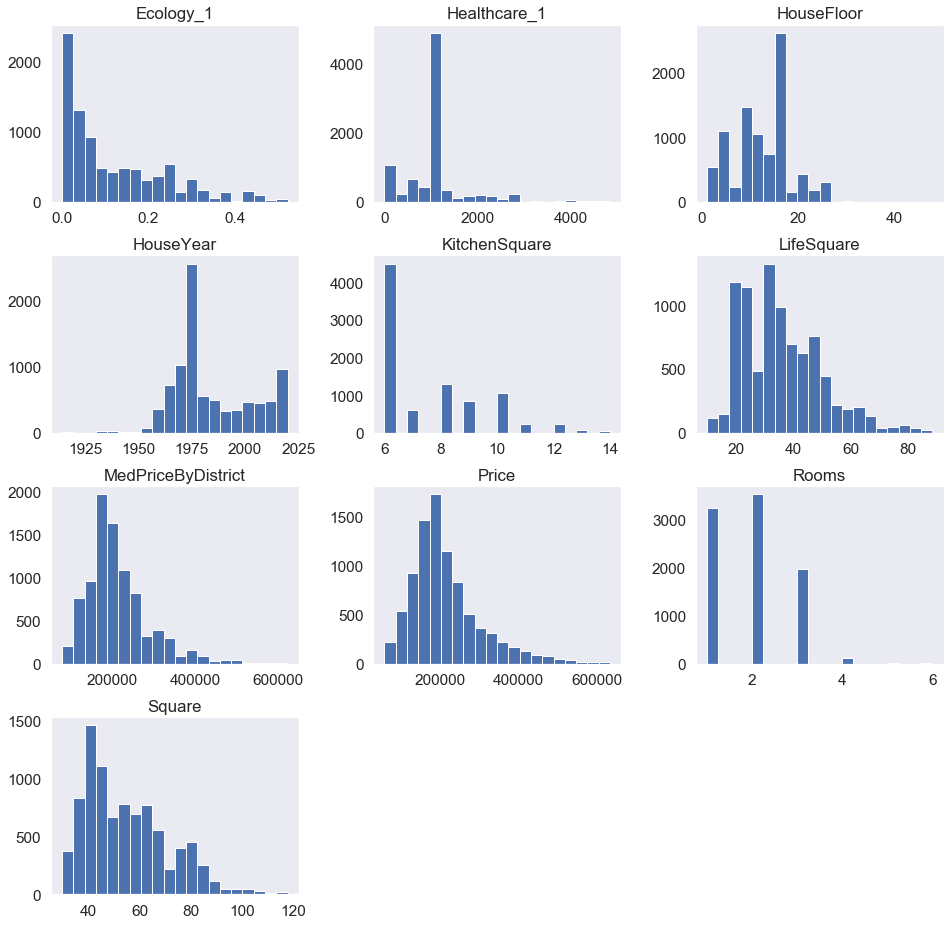

In [2987]:
df_train.select_dtypes('float64', 'int64').hist(figsize=(16,16), bins=20, grid=False);

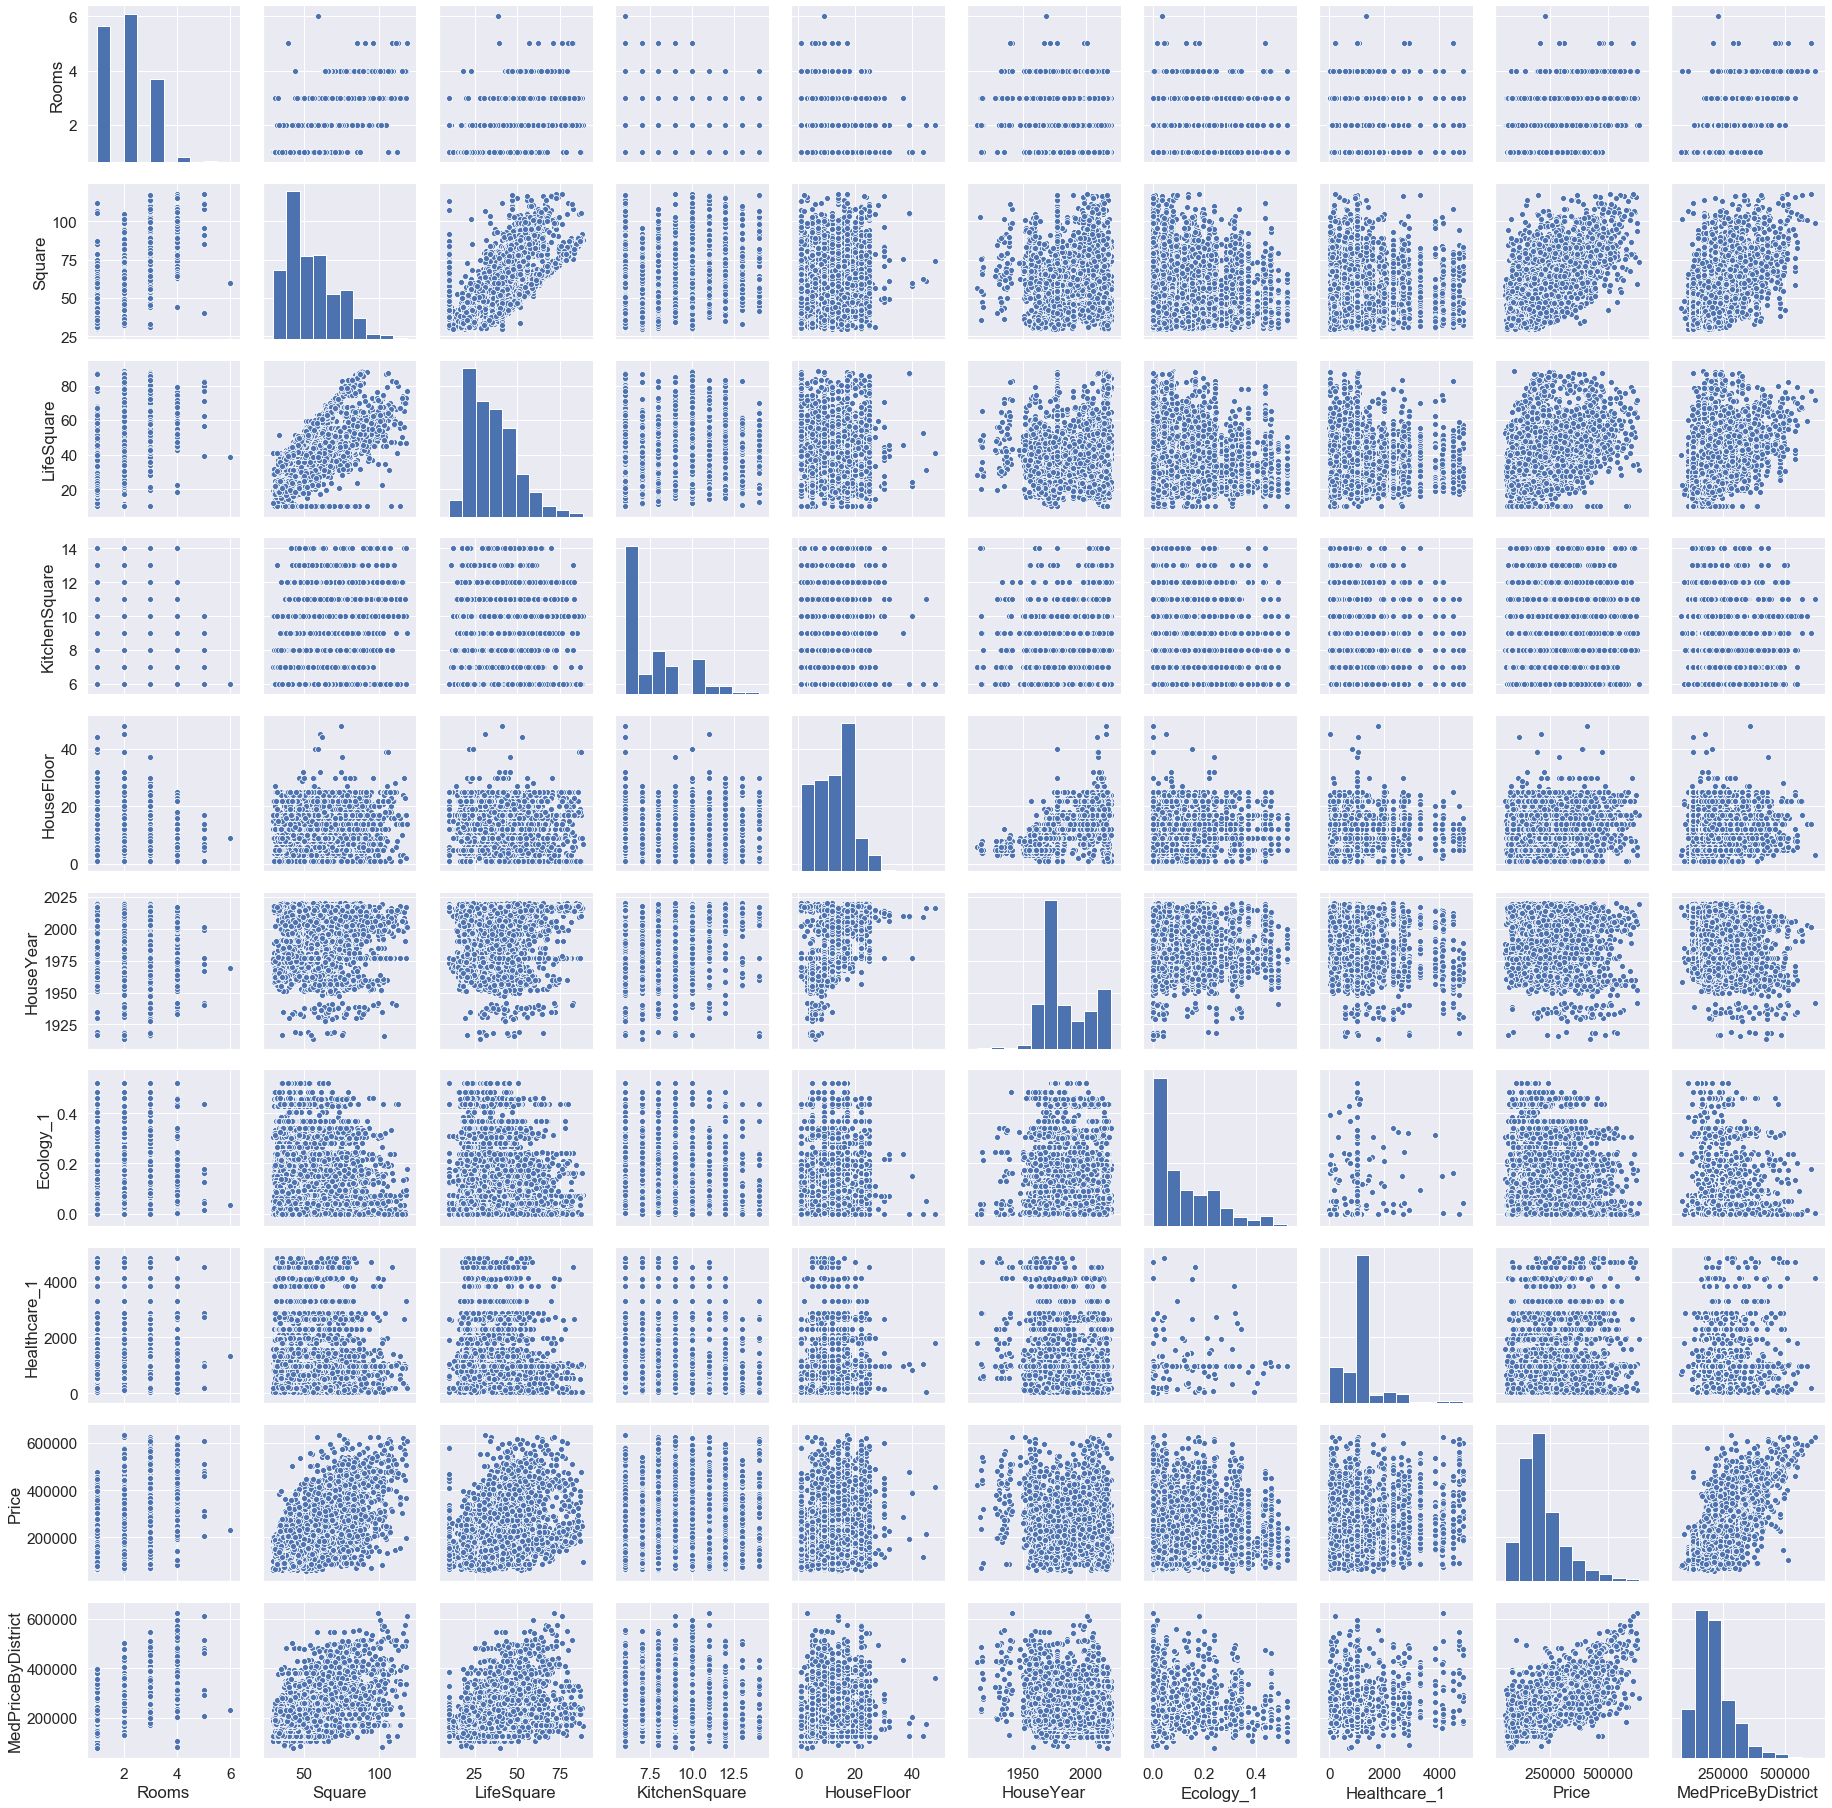

In [2988]:
sns.pairplot(df_train.select_dtypes('float64', 'int64'));

#### Матрица корреляций

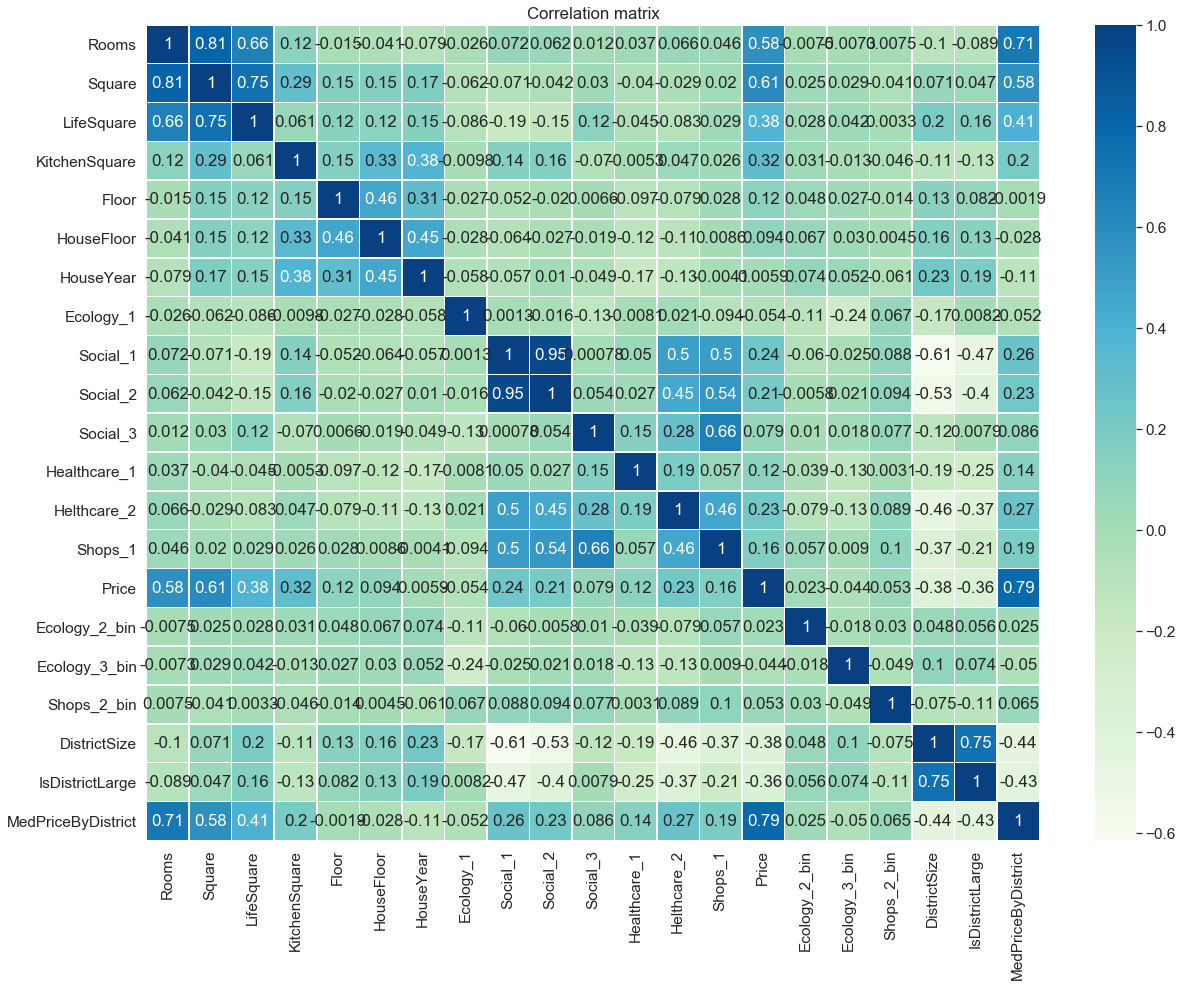

In [2989]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Сохраняем полученный результат

In [2990]:
df_train.to_csv(PREPARED_TRAIN_DATASET_PATH, encoding='utf-8')
df_test.to_csv(PREPARED_TEST_DATASET_PATH, encoding='utf-8')

### Отбор признаков

In [2991]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']
new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']
target_name = 'Price'

In [2992]:
X = df_train[feature_names + new_feature_names]
y = df_train[target_name]

### Разбиение на train и test

In [2993]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Настройка и оценка финальной модели

In [2994]:
final_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train R2:	0.867
Test R2:	0.767


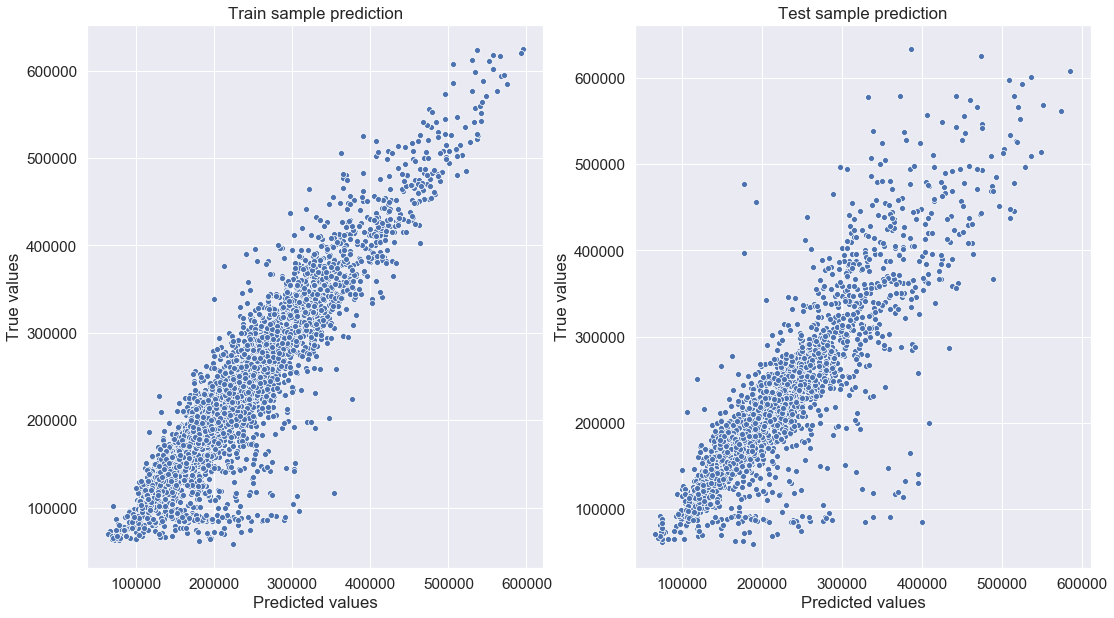

In [2995]:
y_train_preds = final_model.predict(X_train)
y_test_presd = final_model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_presd)


In [2996]:
with open(MODEL_FILE_PATH, 'wb') as f:
    pickle.dump(final_model, f)

### Прогнозируем цены для тестового датафрейма

In [2997]:
y_test_preds = final_model.predict(df_test[feature_names + new_feature_names].fillna(-9999))

### Сохраняем

In [2998]:
df_test['Price'] = y_test_preds
df_test.to_csv(FINAL_PREDICTIONS_PATH, encoding='utf-8', columns=['Price'], index_label='Id')